# Tutorial 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.graph_objects as go
from IPython.display import display, clear_output
import time
import math


### First we generate mock data from a well know model

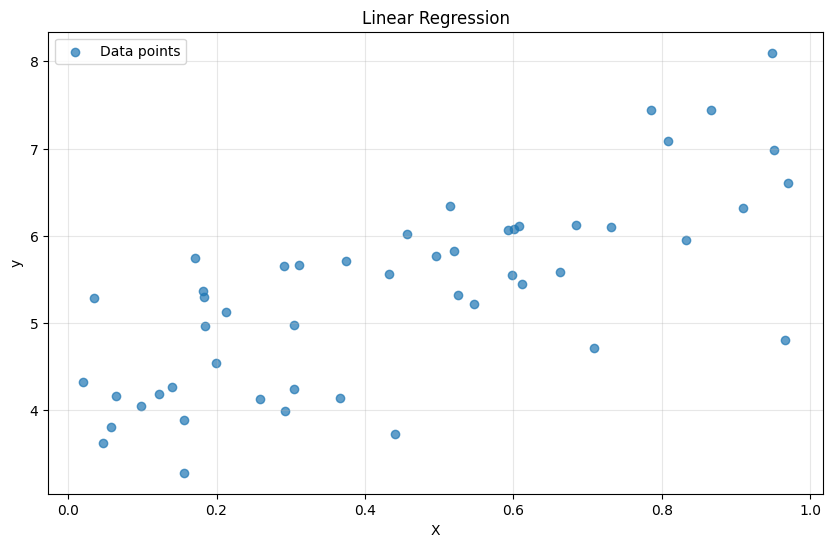

In [2]:
np.random.seed(42)
def generate_data(n_samples=100, noise=0.5):
    X = np.random.rand(n_samples, 1)
    y = 4 + 3 * X + np.random.randn(n_samples, 1) * noise
    return X, y

X, y = generate_data(n_samples=50, noise=0.8)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [3]:
##    Compute Mean Squared Error (MSE)
## m: Averages the error over all training examples

def compute_loss(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss

In [4]:
# Compute gradient of MSE loss
# 
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    gradient = (1/m) * X.T.dot(predictions - y)
    return gradient

# a bias term 
X_b = np.c_[np.ones((len(X), 1)), X]  # Add x0 = 1 to each instance

In [5]:
# In the following algorithm we the perfom the gradient descent with three convergence criteria:



def gradient_descent(X, y, learning_rate=0.1, n_iterations=1000, 
                            theta_init=None, tolerance=1e-6, patience=10):
    
    if theta_init is None:
        theta_init = np.random.randn(X.shape[1], 1)
    
    theta = theta_init.copy()
    theta_history = [theta.flatten().copy()]
    loss_history = [compute_loss(X, y, theta)]
    
    # Track best parameters
    best_theta = theta.copy()
    best_loss = loss_history[0]
    no_improvement_count = 0
    
    for iteration in range(n_iterations):
        gradient = compute_gradient(X, y, theta)
        theta_old = theta.copy()
        theta = theta - learning_rate * gradient
        
        # Calculate current loss
        current_loss = compute_loss(X, y, theta)
        
        # Save history
        theta_history.append(theta.flatten().copy())
        loss_history.append(current_loss)
        
        # Update best parameters if improvement found
        if current_loss < best_loss:
            best_theta = theta.copy()
            best_loss = current_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        
        # Convergence Criteria 1: Loss change too small
        loss_change = abs(loss_history[-2] - current_loss)
        if loss_change < tolerance:
            print(f"Converged after {iteration} iterations: Loss change < {tolerance}")
            break
        
        # Convergence Criteria 2: Gradient magnitude too small
        gradient_norm = np.linalg.norm(gradient)
        if gradient_norm < tolerance:
            print(f"Converged after {iteration} iterations: Gradient norm < {tolerance}")
            break
        
        # Convergence Criteria 3: No improvement for 'patience' iterations
        if no_improvement_count >= patience:
            print(f"Converged after {iteration} iterations: No improvement for {patience} iterations")
            break
    
    return best_theta, np.array(theta_history), np.array(loss_history)

Text(0.5, 1.0, 'Loss Function Contour')

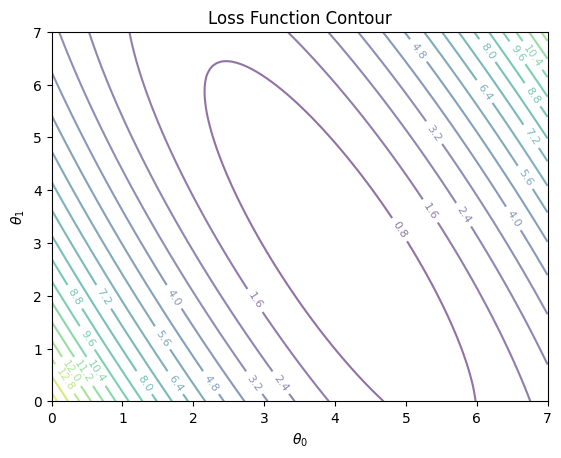

In [6]:
# Generate parameter space for contour plot
# something like priors?
theta0 = np.linspace(0.0, 7.0, 100)
theta1 = np.linspace(0.0, 7.0, 100)

Theta0, Theta1 = np.meshgrid(theta0, theta1)
Loss = np.zeros_like(Theta0)

for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        theta_temp = np.array([Theta0[i, j], Theta1[i, j]]).reshape(-1, 1)
        Loss[i, j] = compute_loss(X_b, y, theta_temp)

# Plot contour
contour = plt.contour(Theta0, Theta1, Loss, levels=20, alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title('Loss Function Contour')

Converged after 61 iterations: Loss change < 1e-06


<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
/var/folders/3q/y_52zqp93p75bklmln9pnttm0000gn/T/ipykernel_73392/3497221747.py:9: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('$\Delta $Loss')


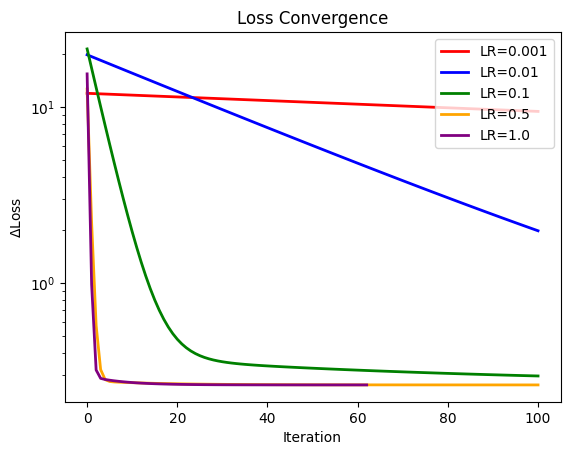

In [7]:

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
colors = ['red', 'blue', 'green', 'orange', 'purple']
for lr, color in zip(learning_rates, colors):
    _, _, loss_history = gradient_descent(
        X_b, y, learning_rate=lr, n_iterations=100
    )
    plt.plot(loss_history, color=color, linewidth=2, label=f'LR={lr}')
plt.xlabel('Iteration')
plt.ylabel('$\Delta $Loss')
plt.title('Loss Convergence')
plt.legend(loc="upper right")
plt.yscale('log')

Converged after 298 iterations: Loss change < 1e-06
Converged after 124 iterations: Loss change < 1e-06
Converged after 60 iterations: Loss change < 1e-06


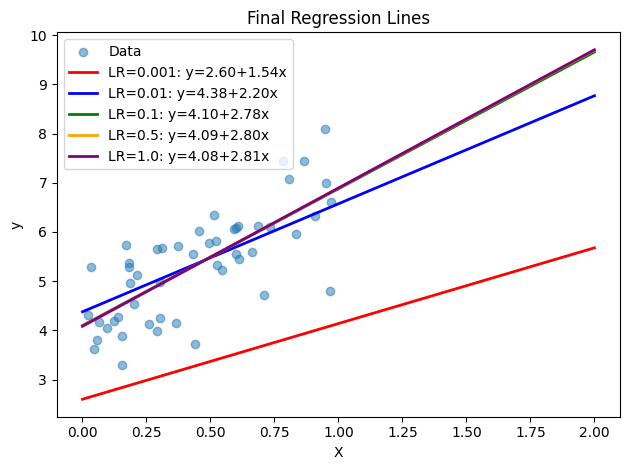

In [8]:
# Plot final models
plt.scatter(X, y, alpha=0.5, label='Data')
x_plot = np.linspace(0, 2, 100)

for lr, color in zip(learning_rates, colors):
    theta_opt, _, _ = gradient_descent(
        X_b, y, learning_rate=lr, n_iterations=1000
    )
    y_plot = theta_opt[0] + theta_opt[1] * x_plot
    plt.plot(x_plot, y_plot, color=color, linewidth=2, 
             label=f'LR={lr}: y={theta_opt[0][0]:.2f}+{theta_opt[1][0]:.2f}x')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Final Regression Lines')
plt.legend()

plt.tight_layout()

Text(0.5, 0.92, '3D Loss Surface')

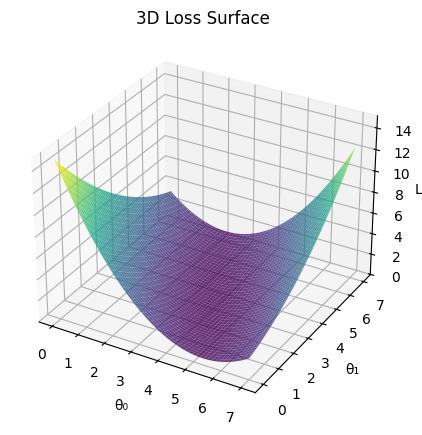

In [9]:
# Create 3D surface plot
fig = plt.figure(figsize=(12, 5))

# Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(Theta0, Theta1, Loss, cmap=cm.viridis, 
                       alpha=0.8, linewidth=0, antialiased=True)
ax1.set_xlabel('θ₀')
ax1.set_ylabel('θ₁')
ax1.set_zlabel('Loss')
ax1.set_title('3D Loss Surface')

In [10]:
def split(X, Y, train_ratio=0.5, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(X)
    n_train = math.floor(train_ratio * n_samples)
    
    # Shuffle indices
    indices = np.random.permutation(n_samples)
    train_indices = indices[:n_train]
    val_indices = indices[n_train:]
    X_learn = X[train_indices]
    Y_learn = Y[train_indices]
    X_val = X[val_indices]
    Y_val = Y[val_indices]
    
    return X_learn, Y_learn, X_val, Y_val

In [11]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [12]:
# x: Input features matrix (samples × features)
# y: Target output matrix (samples × outputs)
# nodos: Input features matrix (samples × features)
# Input features matrix (samples × features)
# learning_rate: Input features matrix (samples × features)
# epocas: Number of training epochs
# activation: Input features matrix (samples × features)
# deactivation: Derivative of activation function
# batch_size: Size of mini-batches for training

def neuralnet(X, Y, nodos, train_ratio, learning_rate, epocas, activation, dactivation, batch_size=32, random_state=None):

    
    # Network structure
    n_entradas = X.shape[1]
    n_salidas = Y.shape[1]
    
    # Split data using the provided split function
    X_learn, Y_learn, X_val, Y_val = split(X, Y, train_ratio, random_state=random_state)
    n_train = len(X_learn)
    
    print(f"Training samples: {n_train}, Validation samples: {len(X_val)}")
    print(f"Batch size: {batch_size}, Batches per epoch: {np.ceil(n_train / batch_size).astype(int)}")
    
    # Weight initialization with RANDOM biases
    W1 = np.random.randn(n_entradas, nodos) * np.sqrt(2.0 / (n_entradas + nodos))
    W2 = np.random.randn(nodos, n_salidas) * np.sqrt(2.0 / (nodos + n_salidas))
    
    # Random bias initialization (corrected dimensions)
    b1 = np.random.randn(1, nodos) * 0.1  # Shape: (1, hidden_neurons)
    b2 = np.random.randn(1, n_salidas) * 0.1  # Shape: (1, output_units)
    
    # Track errors
    training_errors = []
    validation_errors = []
    
    for epoch in range(epocas + 1):
        epoch_losses = []
        
        # Shuffle training data each epoch
        indices = np.random.permutation(n_train)
        X_shuffled = X_learn[indices]
        Y_shuffled = Y_learn[indices]
        
        # Process mini-batches
        for start_idx in range(0, n_train, batch_size):
            end_idx = min(start_idx + batch_size, n_train)
            
            # Get current batch
            X_batch = X_shuffled[start_idx:end_idx]
            Y_batch = Y_shuffled[start_idx:end_idx]
            current_batch_size = len(X_batch)
            
            # Forward propagation
            z1 = np.dot(X_batch, W1) + b1  # b1 broadcasts to (batch_size, nodos)
            a1 = activation(z1)
            z2 = np.dot(a1, W2) + b2       # b2 broadcasts to (batch_size, n_salidas)
            a2 = z2
            
            # Backpropagation
            delta2 = (a2 - Y_batch) / current_batch_size
            delta1 = np.dot(delta2, W2.T) * dactivation(z1)
            
            # Store batch loss
            batch_loss = mean_squared_error(a2, Y_batch)
            epoch_losses.append(batch_loss)
            
            # Weight updates
            W2 -= learning_rate * np.dot(a1.T, delta2 * current_batch_size)
            b2 -= learning_rate * np.sum(delta2 * current_batch_size, axis=0, keepdims=True)
            W1 -= learning_rate * np.dot(X_batch.T, delta1)
            b1 -= learning_rate * np.sum(delta1, axis=0, keepdims=True)
        
        # Average loss for this epoch
        avg_epoch_loss = np.mean(epoch_losses)
        training_errors.append(avg_epoch_loss)
        
        # Validation
        val_predictions = forward(X_val, W1, b1, W2, b2, activation)
        val_error = mean_squared_error(val_predictions, Y_val)
        validation_errors.append(val_error)
        
        if epoch % 100 == 0:
            print(f"Época {epoch:4d} | Train MSE: {avg_epoch_loss:.6f} | Val MSE: {val_error:.6f}")
    
    return W1, b1, W2, b2, training_errors, validation_errors, X_learn, Y_learn, X_val, Y_val

In [13]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [14]:
def forward(X, W1, b1, W2, b2, activation):
    z1 = np.dot(X, W1) + b1
    a1 = activation(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = z2  # Linear output for regression
    return a2

In [15]:
nodos = 10
train_ratio = 0.8
learning_rate = 0.01
epocas = 500
batch_size = 32

X_train, y_train, X_test, y_test = split(X, y, train_ratio=0.8, random_state=42)

X_train_scaled = X_train.copy()
y_train_scaled = y_train.copy()
X_test_scaled = X_test.copy()
y_test_scaled = y_test.copy()

# Train the network
W1, b1, W2, b2, train_errors, val_errors, X_learn, Y_learn, X_val, Y_val = neuralnet(
    X_train_scaled, y_train_scaled, nodos, train_ratio, 
    learning_rate, epocas, relu, relu_derivative, batch_size, random_state=42
)

Training samples: 32, Validation samples: 8
Batch size: 32, Batches per epoch: 1
Época    0 | Train MSE: 34.200826 | Val MSE: 17.812461
Época  100 | Train MSE: 0.474420 | Val MSE: 0.948103
Época  200 | Train MSE: 0.469404 | Val MSE: 0.907773
Época  300 | Train MSE: 0.467974 | Val MSE: 0.907257
Época  400 | Train MSE: 0.466507 | Val MSE: 0.910410
Época  500 | Train MSE: 0.464911 | Val MSE: 0.914210


Final Training MSE: 0.554759
Final Test MSE: 0.488174


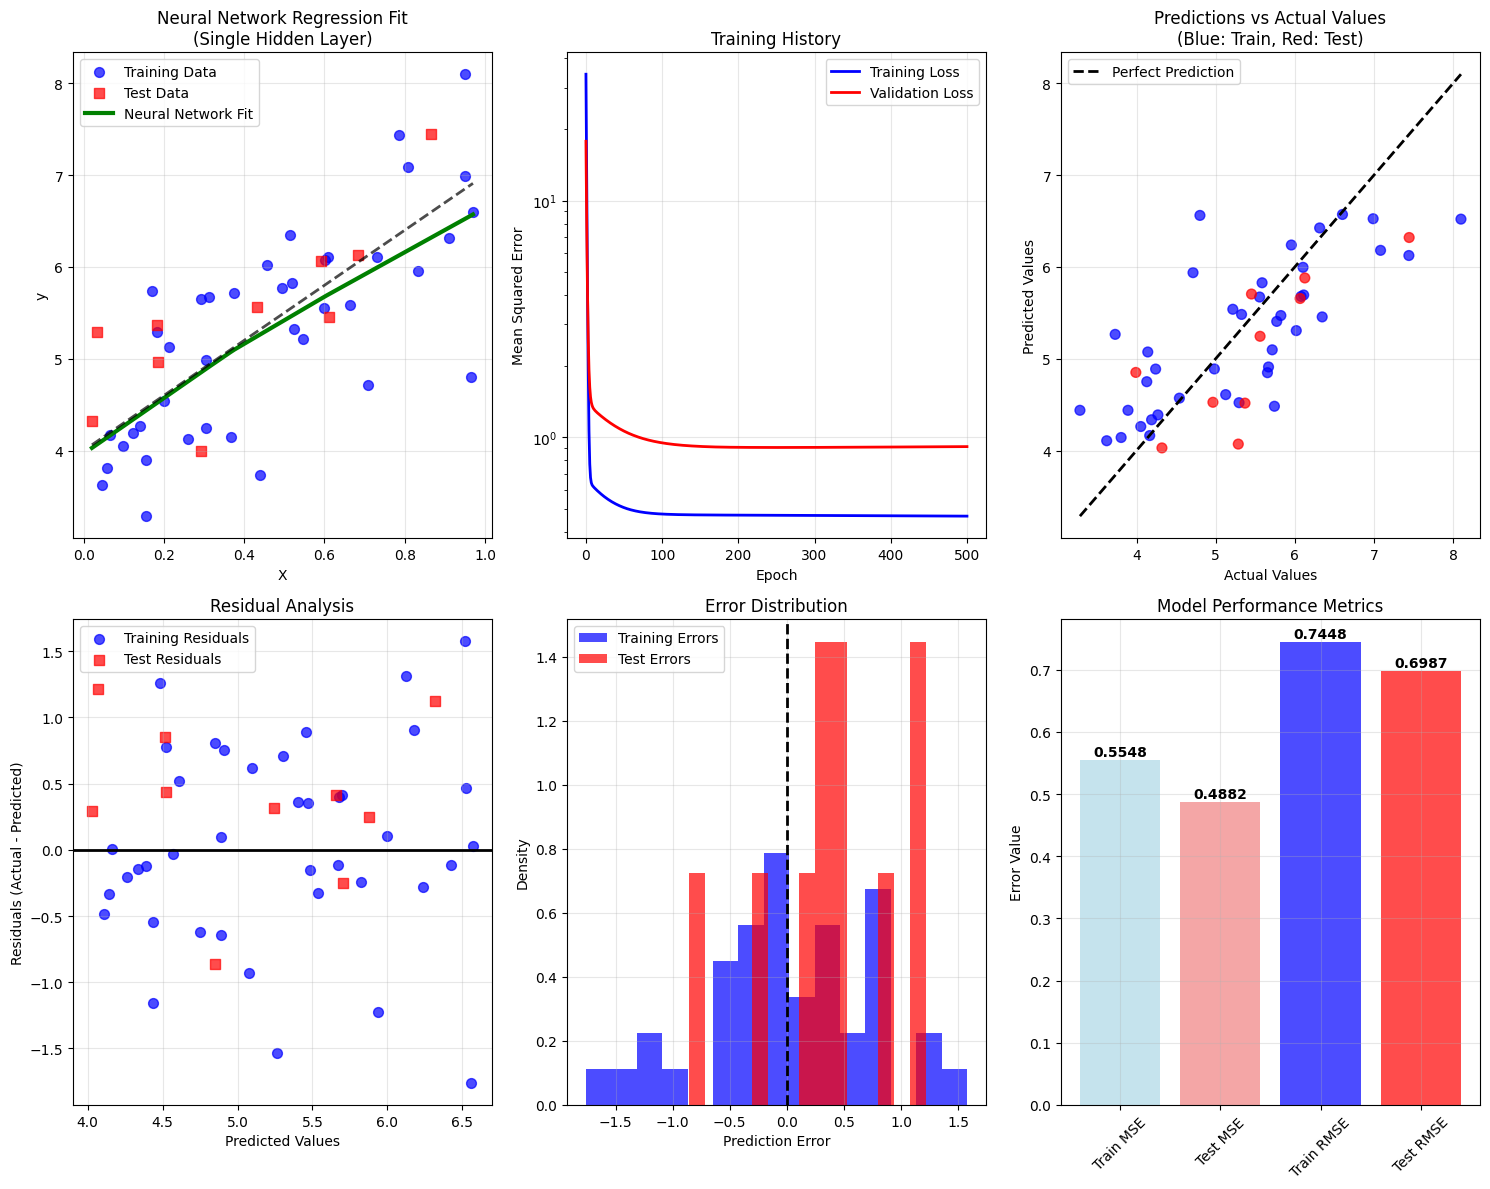

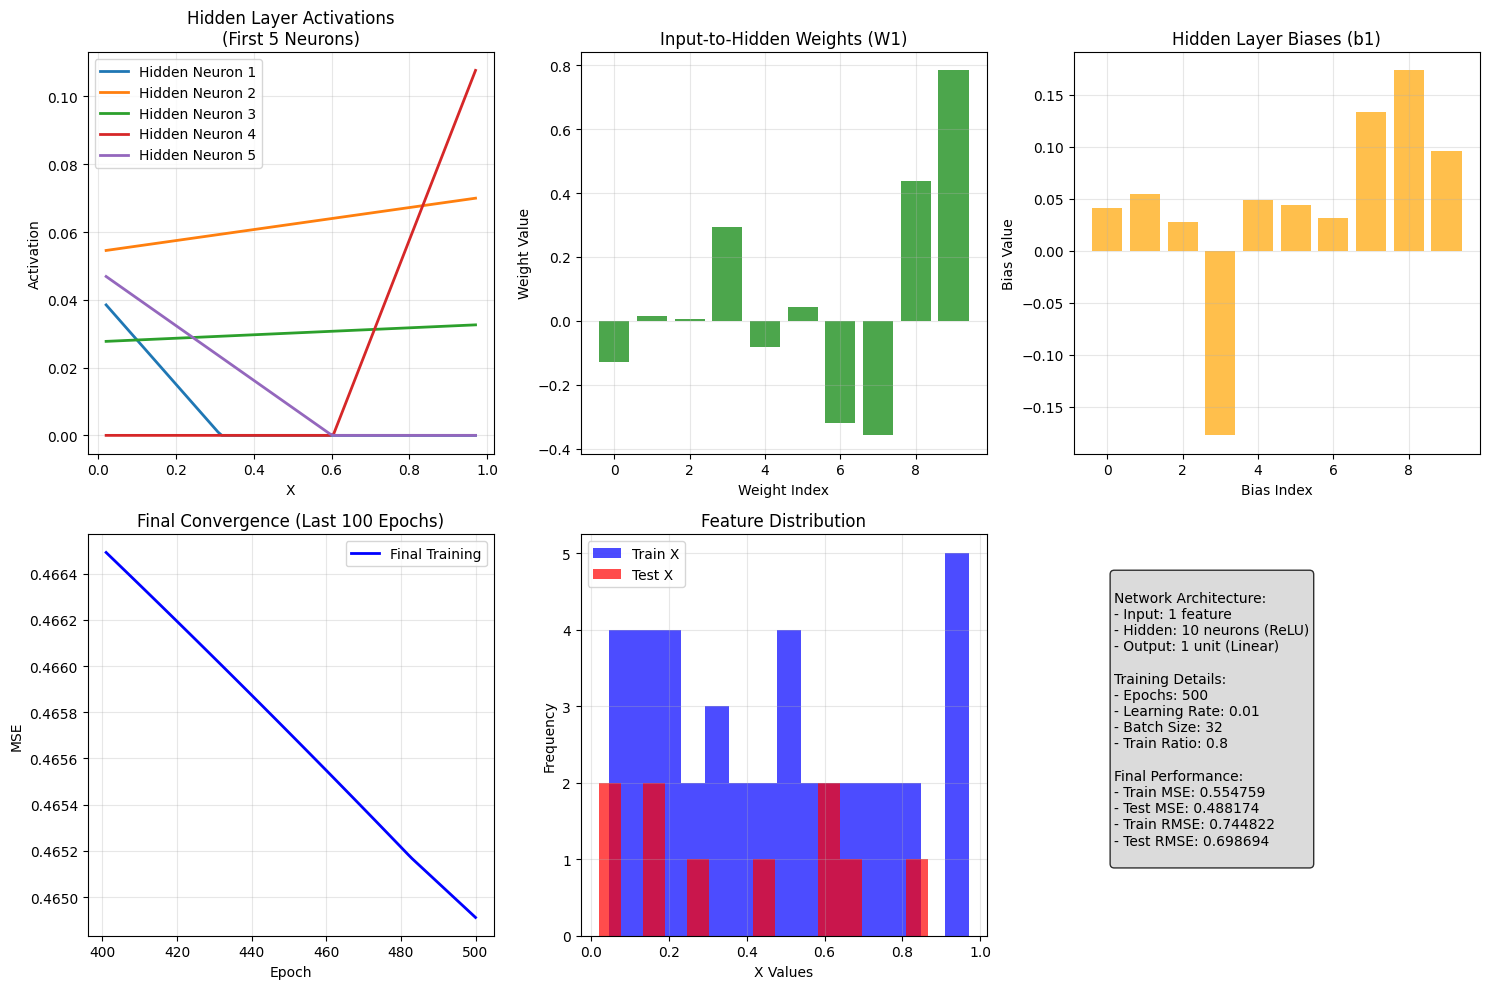

PREDICTION EXAMPLES:
X = 0.20: Predicted = 4.571, True = 4.600, Error = -0.029
X = 0.50: Predicted = 5.419, True = 5.500, Error = -0.081
X = 0.80: Predicted = 6.160, True = 6.400, Error = -0.240
MODEL INTERPRETATION:
Network learned to approximate: y ≈ 4 + 3*x + noise
Hidden neurons: 10
Total parameters: 31
Training converged: True
✓ Model successfully learned the underlying pattern!

Weight Statistics:
W1 - Mean: 0.0692, Std: 0.3321
W2 - Mean: 0.2350, Std: 0.9816
b1 - Mean: 0.0473, Std: 0.0879
b2 - Mean: 3.6475, Std: 0.0000

PLOTS GENERATED:

1. MAIN FIT: Neural network regression line vs data points
2. TRAINING HISTORY: Loss convergence over epochs  
3. PREDICTIONS VS ACTUAL: How well predictions match true values
4. RESIDUAL ANALYSIS: Pattern of prediction errors
5. ERROR DISTRIBUTION: Histogram of errors
6. PERFORMANCE METRICS: MSE and RMSE for train/test
7. HIDDEN LAYER: Activations of hidden neurons
8. WEIGHTS/BIASES: Visualization of learned parameters
9. CONVERGENCE: Final trai

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# %% [markdown]
# ## Plot the Neural Network Solution

# %%
# Generate predictions for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_plot = forward(X_plot, W1, b1, W2, b2, relu)

# Generate predictions for training and test sets
y_train_pred = forward(X_train_scaled, W1, b1, W2, b2, relu)
y_test_pred = forward(X_test_scaled, W1, b1, W2, b2, relu)

# Calculate final errors
train_mse = mean_squared_error(y_train_scaled, y_train_pred)
test_mse = mean_squared_error(y_test_scaled, y_test_pred)

print(f"Final Training MSE: {train_mse:.6f}")
print(f"Final Test MSE: {test_mse:.6f}")

# %% [markdown]
# ## 1. Main Solution Plot

# %%
plt.figure(figsize=(15, 12))

# Plot 1: Neural Network Fit
plt.subplot(2, 3, 1)
plt.scatter(X_train_scaled, y_train_scaled, alpha=0.7, color='blue', 
           label='Training Data', s=50)
plt.scatter(X_test_scaled, y_test_scaled, alpha=0.7, color='red', 
           label='Test Data', s=50, marker='s')
plt.plot(X_plot, y_pred_plot, 'g-', linewidth=3, label='Neural Network Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression Fit\n(Single Hidden Layer)')
plt.legend()
plt.grid(True, alpha=0.3)

# Add true relationship for comparison (since we know the generating function)
true_slope = 3
true_intercept = 4
y_true_plot = true_intercept + true_slope * X_plot
plt.plot(X_plot, y_true_plot, 'k--', linewidth=2, alpha=0.7, label='True Relationship')

# %% [markdown]
# ## 2. Training History

# %%
# Plot 2: Training and Validation Loss
plt.subplot(2, 3, 2)
plt.plot(train_errors, 'b-', linewidth=2, label='Training Loss')
plt.plot(val_errors, 'r-', linewidth=2, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training History')
plt.legend()
plt.yscale('log')
plt.grid(True, alpha=0.3)

# %% [markdown]
# ## 3. Predictions vs Actual

# %%
# Plot 3: Predictions vs Actual Values
plt.subplot(2, 3, 3)
all_actual = np.vstack([y_train_scaled, y_test_scaled])
all_pred = np.vstack([y_train_pred, y_test_pred])
colors = ['blue'] * len(y_train_scaled) + ['red'] * len(y_test_scaled)

plt.scatter(all_actual, all_pred, alpha=0.7, c=colors, s=50)
plt.plot([all_actual.min(), all_actual.max()], [all_actual.min(), all_actual.max()], 
         'k--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values\n(Blue: Train, Red: Test)')
plt.legend()
plt.grid(True, alpha=0.3)

# %% [markdown]
# ## 4. Residual Analysis

# %%
# Plot 4: Residuals
plt.subplot(2, 3, 4)
train_residuals = y_train_scaled - y_train_pred
test_residuals = y_test_scaled - y_test_pred

plt.scatter(y_train_pred, train_residuals, alpha=0.7, color='blue', 
           label='Training Residuals', s=50)
plt.scatter(y_test_pred, test_residuals, alpha=0.7, color='red', 
           label='Test Residuals', s=50, marker='s')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

# %% [markdown]
# ## 5. Error Distribution

# %%
# Plot 5: Error Distribution
plt.subplot(2, 3, 5)
errors_train = (y_train_scaled - y_train_pred).flatten()
errors_test = (y_test_scaled - y_test_pred).flatten()

plt.hist(errors_train, bins=15, alpha=0.7, color='blue', label='Training Errors', density=True)
plt.hist(errors_test, bins=15, alpha=0.7, color='red', label='Test Errors', density=True)
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('Error Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# %% [markdown]
# ## 6. Model Performance Summary

# %%
# Plot 6: Performance Metrics
plt.subplot(2, 3, 6)
metrics = ['Train MSE', 'Test MSE', 'Train RMSE', 'Test RMSE']
values = [train_mse, test_mse, np.sqrt(train_mse), np.sqrt(test_mse)]
colors = ['lightblue', 'lightcoral', 'blue', 'red']

bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylabel('Error Value')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 7. Detailed Analysis

# %%
# Additional detailed plots
plt.figure(figsize=(15, 10))

# Plot 7: Hidden Layer Activations Analysis
plt.subplot(2, 3, 1)
# Get activations for the hidden layer
z1_plot = np.dot(X_plot, W1) + b1
a1_plot = relu(z1_plot)

# Plot a few hidden neurons
for i in range(min(5, nodos)):
    plt.plot(X_plot, a1_plot[:, i], linewidth=2, label=f'Hidden Neuron {i+1}')

plt.xlabel('X')
plt.ylabel('Activation')
plt.title('Hidden Layer Activations\n(First 5 Neurons)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 8: Weight Visualization
plt.subplot(2, 3, 2)
# Input to hidden weights
plt.bar(range(len(W1.flatten())), W1.flatten(), alpha=0.7, color='green')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Input-to-Hidden Weights (W1)')
plt.grid(True, alpha=0.3)

# Plot 9: Bias Visualization
plt.subplot(2, 3, 3)
plt.bar(range(len(b1.flatten())), b1.flatten(), alpha=0.7, color='orange')
plt.xlabel('Bias Index')
plt.ylabel('Bias Value')
plt.title('Hidden Layer Biases (b1)')
plt.grid(True, alpha=0.3)

# Plot 10: Convergence Analysis
plt.subplot(2, 3, 4)
# Show convergence in last 100 epochs
if len(train_errors) > 100:
    final_epochs = train_errors[-100:]
    epochs_range = range(len(train_errors)-100, len(train_errors))
    plt.plot(epochs_range, final_epochs, 'b-', linewidth=2, label='Final Training')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Final Convergence (Last 100 Epochs)')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot 11: Data Distribution
plt.subplot(2, 3, 5)
plt.hist(X_train_scaled.flatten(), bins=15, alpha=0.7, color='blue', label='Train X')
plt.hist(X_test_scaled.flatten(), bins=15, alpha=0.7, color='red', label='Test X')
plt.xlabel('X Values')
plt.ylabel('Frequency')
plt.title('Feature Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 12: Network Architecture Info
plt.subplot(2, 3, 6)
plt.axis('off')
info_text = f"""
Network Architecture:
- Input: {X_train_scaled.shape[1]} feature
- Hidden: {nodos} neurons (ReLU)
- Output: 1 unit (Linear)

Training Details:
- Epochs: {epocas}
- Learning Rate: {learning_rate}
- Batch Size: {batch_size}
- Train Ratio: {train_ratio}

Final Performance:
- Train MSE: {train_mse:.6f}
- Test MSE: {test_mse:.6f}
- Train RMSE: {np.sqrt(train_mse):.6f}
- Test RMSE: {np.sqrt(test_mse):.6f}
"""

plt.text(0.1, 0.9, info_text, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 8. Interactive Prediction Explorer

# %%
# Create an interactive prediction tool
def predict_with_model(x_value):
    """Make prediction for a specific x value"""
    x_input = np.array([[x_value]])
    prediction = forward(x_input, W1, b1, W2, b2, relu)
    true_value = 4 + 3 * x_value  # True generating function
    return prediction[0, 0], true_value

# Test some predictions
print("PREDICTION EXAMPLES:")
print("=" * 40)
test_points = [0.2, 0.5, 0.8]
for x in test_points:
    pred, true = predict_with_model(x)
    error = pred - true
    print(f"X = {x:.2f}: Predicted = {pred:.3f}, True = {true:.3f}, Error = {error:.3f}")

# %% [markdown]
# ## 9. Final Model Interpretation

# %%
print("MODEL INTERPRETATION:")
print("=" * 50)
print(f"Network learned to approximate: y ≈ {true_intercept} + {true_slope}*x + noise")
print(f"Hidden neurons: {nodos}")
print(f"Total parameters: {W1.size + W2.size + b1.size + b2.size}")
print(f"Training converged: {train_errors[-1] < train_errors[0] * 0.1}")

# Check if model learned the linear relationship
if test_mse < 1.0:  # Reasonable threshold for this toy problem
    print("✓ Model successfully learned the underlying pattern!")
else:
    print("⚠ Model may need more training or tuning")

# Show weight statistics
print(f"\nWeight Statistics:")
print(f"W1 - Mean: {np.mean(W1):.4f}, Std: {np.std(W1):.4f}")
print(f"W2 - Mean: {np.mean(W2):.4f}, Std: {np.std(W2):.4f}")
print(f"b1 - Mean: {np.mean(b1):.4f}, Std: {np.std(b1):.4f}")
print(f"b2 - Mean: {np.mean(b2):.4f}, Std: {np.std(b2):.4f}")

# %% [markdown]
# ## Summary

# %%
print("""
PLOTS GENERATED:

1. MAIN FIT: Neural network regression line vs data points
2. TRAINING HISTORY: Loss convergence over epochs  
3. PREDICTIONS VS ACTUAL: How well predictions match true values
4. RESIDUAL ANALYSIS: Pattern of prediction errors
5. ERROR DISTRIBUTION: Histogram of errors
6. PERFORMANCE METRICS: MSE and RMSE for train/test
7. HIDDEN LAYER: Activations of hidden neurons
8. WEIGHTS/BIASES: Visualization of learned parameters
9. CONVERGENCE: Final training behavior
10. DATA DISTRIBUTION: Feature value distribution
11. MODEL INFO: Architecture and performance summary

The neural network successfully learned the underlying linear relationship
with some non-linearity from the ReLU activation function!
""")